# RNNの復習はここに

### nerの復習

###### データ読み込み
###### label encoding
###### 辞書作成　エンコード
###### データ分割
###### padding
###### 学習準備
###### モデルの定義
###### 学習ループ
###### 評価

In [1]:
import pickle

In [2]:
# ラベルデータ
with open('ner_dataset_labels.txt', 'rb') as fp:
    labels = pickle.load(fp)
# sentenceデータ
with open('ner_dataset_sentences.txt', 'rb') as fp:
    sentences = pickle.load(fp)

In [3]:
sentences

['The cat sat on the mat .',
 'John lives in New York .',
 'I have two dogs .',
 'She works at Google .',
 'The Eiffel Tower is in Paris .',
 'He is from Spain .',
 'I visited the Great Wall of China .',
 'She is studying at Oxford University .',
 'He works for the United Nations .',
 'Berlin is the capital of Germany .',
 'Mount Everest is the highest peak in the world .',
 'The Nile is the longest river in the world .',
 'The Pyramids are located in Egypt .',
 'The Sahara desert is in Africa .',
 'I work at Microsoft .',
 'She is from Australia .',
 'He is going to Paris for a meeting .',
 'The Amazon is the largest rainforest .',
 'He studied at Harvard .',
 'Mona Lisa is a famous painting .',
 'Shakespeare is known for Romeo and Juliet .',
 'Albert Einstein was a physicist .',
 'The Leaning Tower of Pisa is in Italy .',
 'The Great Barrier Reef is in Australia .',
 'She works at Facebook .',
 'The Grand Canyon is in Arizona .',
 'She is studying at the University of Tokyo .',
 'He 

In [4]:
labels

[['O', 'O', 'O', 'O', 'O', 'O', 'O'],
 ['B-per', 'O', 'O', 'B-geo', 'I-geo', 'O'],
 ['O', 'O', 'O', 'O', 'O'],
 ['O', 'O', 'O', 'B-org', 'O'],
 ['O', 'B-geo', 'I-geo', 'O', 'O', 'B-geo', 'O'],
 ['O', 'O', 'O', 'B-geo', 'O'],
 ['O', 'O', 'O', 'B-geo', 'I-geo', 'I-geo', 'I-geo', 'O'],
 ['O', 'O', 'O', 'O', 'B-org', 'I-org', 'O'],
 ['O', 'O', 'O', 'O', 'B-org', 'I-org', 'O'],
 ['B-geo', 'O', 'O', 'O', 'O', 'B-geo', 'O'],
 ['B-geo', 'I-geo', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'],
 ['O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'],
 ['O', 'B-geo', 'O', 'O', 'O', 'B-geo', 'O'],
 ['O', 'B-geo', 'O', 'O', 'O', 'B-geo', 'O'],
 ['O', 'O', 'O', 'B-org', 'O'],
 ['O', 'O', 'O', 'B-geo', 'O'],
 ['O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O'],
 ['O', 'B-geo', 'O', 'O', 'O', 'O', 'O'],
 ['O', 'O', 'O', 'B-org', 'O'],
 ['B-per', 'I-per', 'O', 'O', 'O', 'O', 'O'],
 ['B-per', 'O', 'O', 'O', 'O', 'O', 'O', 'O'],
 ['B-per', 'I-per', 'O', 'O', 'O', 'O'],
 ['O', 'B-geo', 'I-geo', 'I-geo', 'I-geo', '

### label encoding

In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [6]:
# まず、全てのラベルを取得するために全データで1つのリストにする
all_labels = [label for sublabel in labels for label in sublabel]

# これに対してlabel encoderのfit
label_encoder.fit(all_labels) # labelのidを作成する

# labelsに対して適用する。padding用に+1することに注意
encodered_labels = [label_encoder.transform(sublabel) + 1 for sublabel in labels]

In [7]:
encodered_labels

[array([7, 7, 7, 7, 7, 7, 7]),
 array([3, 7, 7, 1, 4, 7]),
 array([7, 7, 7, 7, 7]),
 array([7, 7, 7, 2, 7]),
 array([7, 1, 4, 7, 7, 1, 7]),
 array([7, 7, 7, 1, 7]),
 array([7, 7, 7, 1, 4, 4, 4, 7]),
 array([7, 7, 7, 7, 2, 5, 7]),
 array([7, 7, 7, 7, 2, 5, 7]),
 array([1, 7, 7, 7, 7, 1, 7]),
 array([1, 4, 7, 7, 7, 7, 7, 7, 7, 7]),
 array([7, 1, 7, 7, 7, 7, 7, 7, 7, 7]),
 array([7, 1, 7, 7, 7, 1, 7]),
 array([7, 1, 7, 7, 7, 1, 7]),
 array([7, 7, 7, 2, 7]),
 array([7, 7, 7, 1, 7]),
 array([7, 7, 7, 7, 1, 7, 7, 7, 7]),
 array([7, 1, 7, 7, 7, 7, 7]),
 array([7, 7, 7, 2, 7]),
 array([3, 6, 7, 7, 7, 7, 7]),
 array([3, 7, 7, 7, 7, 7, 7, 7]),
 array([3, 6, 7, 7, 7, 7]),
 array([7, 1, 4, 4, 4, 7, 7, 1, 7]),
 array([7, 1, 4, 4, 7, 7, 1, 7]),
 array([7, 7, 7, 2, 7]),
 array([7, 1, 4, 7, 7, 1, 7]),
 array([7, 7, 7, 7, 7, 2, 5, 5, 7]),
 array([7, 7, 7, 1, 4, 7]),
 array([7, 7, 7, 1, 7, 7, 7]),
 array([7, 7, 7, 7, 2, 5, 5, 7])]

### 辞書作成 エンコード

In [8]:
word2indx = {'<PAD>':0}
encodered_sentences = []
for sentence in sentences:
    encodered_sentence = [word2indx.setdefault(word, len(word2indx)) for word in sentence.split() ]
    encodered_sentences.append(encodered_sentence) # ここでようやく2次元に 

In [9]:
encodered_sentences

[[1, 2, 3, 4, 5, 6, 7],
 [8, 9, 10, 11, 12, 7],
 [13, 14, 15, 16, 7],
 [17, 18, 19, 20, 7],
 [1, 21, 22, 23, 10, 24, 7],
 [25, 23, 26, 27, 7],
 [13, 28, 5, 29, 30, 31, 32, 7],
 [17, 23, 33, 19, 34, 35, 7],
 [25, 18, 36, 5, 37, 38, 7],
 [39, 23, 5, 40, 31, 41, 7],
 [42, 43, 23, 5, 44, 45, 10, 5, 46, 7],
 [1, 47, 23, 5, 48, 49, 10, 5, 46, 7],
 [1, 50, 51, 52, 10, 53, 7],
 [1, 54, 55, 23, 10, 56, 7],
 [13, 57, 19, 58, 7],
 [17, 23, 26, 59, 7],
 [25, 23, 60, 61, 24, 36, 62, 63, 7],
 [1, 64, 23, 5, 65, 66, 7],
 [25, 67, 19, 68, 7],
 [69, 70, 23, 62, 71, 72, 7],
 [73, 23, 74, 36, 75, 76, 77, 7],
 [78, 79, 80, 62, 81, 7],
 [1, 82, 22, 31, 83, 23, 10, 84, 7],
 [1, 29, 85, 86, 23, 10, 59, 7],
 [17, 18, 19, 87, 7],
 [1, 88, 89, 23, 10, 90, 7],
 [17, 23, 33, 19, 5, 35, 31, 91, 7],
 [25, 9, 10, 92, 93, 7],
 [94, 51, 95, 96, 97, 98, 7],
 [25, 18, 36, 5, 99, 100, 101, 7]]

In [10]:
word2indx

{'<PAD>': 0,
 'The': 1,
 'cat': 2,
 'sat': 3,
 'on': 4,
 'the': 5,
 'mat': 6,
 '.': 7,
 'John': 8,
 'lives': 9,
 'in': 10,
 'New': 11,
 'York': 12,
 'I': 13,
 'have': 14,
 'two': 15,
 'dogs': 16,
 'She': 17,
 'works': 18,
 'at': 19,
 'Google': 20,
 'Eiffel': 21,
 'Tower': 22,
 'is': 23,
 'Paris': 24,
 'He': 25,
 'from': 26,
 'Spain': 27,
 'visited': 28,
 'Great': 29,
 'Wall': 30,
 'of': 31,
 'China': 32,
 'studying': 33,
 'Oxford': 34,
 'University': 35,
 'for': 36,
 'United': 37,
 'Nations': 38,
 'Berlin': 39,
 'capital': 40,
 'Germany': 41,
 'Mount': 42,
 'Everest': 43,
 'highest': 44,
 'peak': 45,
 'world': 46,
 'Nile': 47,
 'longest': 48,
 'river': 49,
 'Pyramids': 50,
 'are': 51,
 'located': 52,
 'Egypt': 53,
 'Sahara': 54,
 'desert': 55,
 'Africa': 56,
 'work': 57,
 'Microsoft': 58,
 'Australia': 59,
 'going': 60,
 'to': 61,
 'a': 62,
 'meeting': 63,
 'Amazon': 64,
 'largest': 65,
 'rainforest': 66,
 'studied': 67,
 'Harvard': 68,
 'Mona': 69,
 'Lisa': 70,
 'famous': 71,
 'painti

### 訓練データ、検証データに分割する

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_val, y_train, y_val, train_sentences, val_sentences = train_test_split(encodered_sentences, encodered_labels, sentences, test_size=0.3, random_state=42)

In [13]:
print(X_train[:1])
print(y_train[:1])
print(train_sentences[:1])

[[1, 2, 3, 4, 5, 6, 7]]
[array([7, 7, 7, 7, 7, 7, 7])]
['The cat sat on the mat .']


In [14]:
from torch.nn.utils.rnn import pad_sequence
import torch

### padding

In [15]:
X_train = pad_sequence([torch.tensor(x) for x in X_train], batch_first=True)
X_val = pad_sequence([torch.tensor(x) for x in X_val], batch_first=True)
y_train = pad_sequence([torch.tensor(y) for y in y_train], batch_first=True)
y_val = pad_sequence([torch.tensor(y) for y in y_val], batch_first=True)

### モデルの定義　

### この後に、双方向、Deepに対応させて再度実行する

In [19]:
import torch.nn as nn
from model import Model, PytorchModel
import torch


import pickle # ピクル
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import torch
import torch.optim as optim
import torch.nn as nn
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
import matplotlib.pyplot as plt

In [23]:
vocab_size = len(word2indx) # 102
num_classes = len(label_encoder.classes_) + 1 # クラス数 paddingも考慮して+1をする 8クラスになる
embedding_dim = 50
hidden_size = 70 # 一般的にはembedding_dimより減らす
output_size = num_classes
batch_size = 3
learning_rate = 0.03

# モデルの定義
model = PytorchModel(vocab_size, embedding_dim, hidden_size, output_size, rnn_type='LSTM', bidirectional=True, num_layers=3)

# Dataset DataLoader作成
train_dataset = TensorDataset(X_train, y_train) # datasetを作成してくれる。便利
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataset = TensorDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# 損失関数とoptimizer
opt = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss(ignore_index=0)



In [24]:
# 損失関数とoptimizer
opt = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss(ignore_index=0)

num_epochs = 30
eary_stopping = 5

# ログ
# est_val_loss = float('inf')
train_losses = []
val_losses = []
val_accuracies = []

# GPU設定
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')



for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_val_loss = 0.0
    total_correct = 0
    
    # training
    for i, (sentences, labels) in tqdm(enumerate(train_loader), desc='now training', total=len(train_loader), leave=False):
        sentences = sentences.to(device)
        labels = labels.to(device)
        opt.zero_grad()
        output, _ = model(sentences) # [batch_size, seq_len, num_classes]
        output = output.reshape(-1, num_classes) # [batch_size, seq_len, num_classes] -> [batch_size * seq_len, num_classes]
        labels = labels.view(-1) # [batch_size, seq_len] -> [batch_size * seq_len]
        loss = criterion(output, labels)
        loss.backward()
        running_loss += loss.item()
        opt.step()
    train_losses.append(running_loss / len(train_loader))

    # validation
    # 評価用

    total_num = 0
    total_correct = 0

    for i, (sentences, labels) in tqdm(enumerate(val_loader), desc='valdation', total=len(val_loader), leave=False):
        model.eval()
        with torch.no_grad():
            
            sentences = sentences.to(device)
            labels = labels.to(device)
            output, _ = model(sentences) # [batch_size, seq_len, num_classes]
    
            # accuracy計算
            _, predicted = torch.max(output, -1) #[batch_size, seq_len]
            total_correct += torch.sum(predicted == labels).item()
            total_num += labels.numel() # [batch_size * seq_len]
    
            
            output = output.reshape(-1, num_classes) # [batch_size, seq_len, num_classes] -> [batch_size * seq_len, num_classes]
            labels = labels.view(-1) # [batch_size, seq_len] -> [batch_size * seq_len]
            loss = criterion(output, labels)
            running_val_loss += loss.item()
    
    val_losses.append(running_val_loss / len(val_loader))
    val_accuracies.append(total_correct / total_num)
    print(f"epoch={epoch}  train_losse={train_losses[-1]:.4f} val_loss={val_losses[-1]:.4f} val_accuracy={val_accuracies[-1]:.4f}")

epoch=0  train_losse=1.5275 val_loss=1.0082 val_accuracy=0.5972


epoch=1  train_losse=1.0736 val_loss=1.0135 val_accuracy=0.5972


epoch=2  train_losse=0.8442 val_loss=0.7651 val_accuracy=0.5972


epoch=3  train_losse=0.5092 val_loss=0.7298 val_accuracy=0.5694


epoch=4  train_losse=0.2981 val_loss=1.1558 val_accuracy=0.5694


epoch=5  train_losse=0.2136 val_loss=1.3621 val_accuracy=0.5694


epoch=6  train_losse=0.1516 val_loss=1.6202 val_accuracy=0.5694


epoch=7  train_losse=0.1749 val_loss=1.7418 val_accuracy=0.5694


epoch=8  train_losse=0.0939 val_loss=1.5565 val_accuracy=0.5972


epoch=9  train_losse=0.0447 val_loss=1.9875 val_accuracy=0.5833


epoch=10  train_losse=0.0247 val_loss=2.0535 val_accuracy=0.5833


epoch=11  train_losse=0.0100 val_loss=2.1556 val_accuracy=0.5833


epoch=12  train_losse=0.0066 val_loss=2.2421 val_accuracy=0.5833


epoch=13  train_losse=0.0040 val_loss=2.3023 val_accuracy=0.5833


epoch=14  train_losse=0.0029 val_loss=2.3628 val_accuracy=0.5833


epoch=15  train_losse=0.0023 val_loss=2.4184 val_accuracy=0.5833


epoch=16  train_losse=0.0021 val_loss=2.4664 val_accuracy=0.5833


epoch=17  train_losse=0.0015 val_loss=2.5086 val_accuracy=0.5833


epoch=18  train_losse=0.0014 val_loss=2.5481 val_accuracy=0.5833


epoch=19  train_losse=0.0013 val_loss=2.5826 val_accuracy=0.5833


epoch=20  train_losse=0.0011 val_loss=2.6088 val_accuracy=0.5833


epoch=21  train_losse=0.0009 val_loss=2.6295 val_accuracy=0.5833


epoch=22  train_losse=0.0008 val_loss=2.6496 val_accuracy=0.5833


epoch=23  train_losse=0.0008 val_loss=2.6668 val_accuracy=0.5833


epoch=24  train_losse=0.0008 val_loss=2.6836 val_accuracy=0.5833


epoch=25  train_losse=0.0006 val_loss=2.6974 val_accuracy=0.5833


epoch=26  train_losse=0.0007 val_loss=2.7108 val_accuracy=0.5833


epoch=27  train_losse=0.0006 val_loss=2.7210 val_accuracy=0.5833


epoch=28  train_losse=0.0006 val_loss=2.7326 val_accuracy=0.5833


epoch=29  train_losse=0.0005 val_loss=2.7451 val_accuracy=0.5833


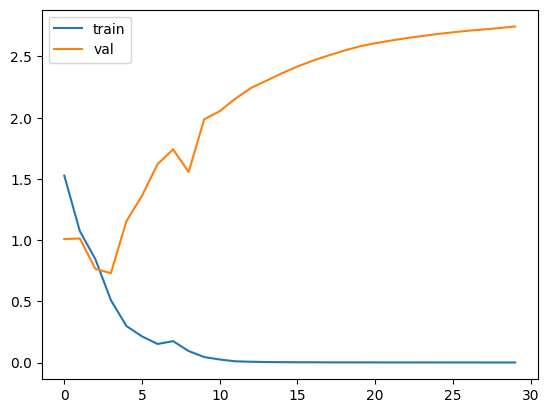

In [25]:
plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.legend()
plt.show()